Import Libraries such as numpy,seaborn, pandas, and matplotlib.pyplot

Link onedrive(video penjelasan semua nomor): https://binusianorg-my.sharepoint.com/personal/nicholas_javier_binus_ac_id/_layouts/15/guestaccess.aspx?share=ER_SwVOgwr1GgVXre8eBkjQBs8GBPpUdQTa-12VatGVNXw

Link onedrive(backup): https://binusianorg-my.sharepoint.com/personal/nicholas_javier_binus_ac_id/_layouts/15/guestaccess.aspx?share=ER_SwVOgwr1GgVXre8eBkjQBs8GBPpUdQTa-12VatGVNXw&nav=eyJyZWZlcnJhbEluZm8iOnsicmVmZXJyYWxBcHAiOiJPbmVEcml2ZUZvckJ1c2luZXNzIiwicmVmZXJyYWxBcHBQbGF0Zm9ybSI6IldlYiIsInJlZmVycmFsTW9kZSI6InZpZXciLCJyZWZlcnJhbFZpZXciOiJNeUZpbGVzTGlua0NvcHkifX0&e=EZxLJy

Link youtube(video penjelasan semua nomor): https://youtu.be/IEJqxwOFtPM


In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

Import library seperti numpy, seaborn, pandas, dan matplotlib pyplot.

# NIM - Nama - Kelas : 2502041956 - Nicholas Javier - LA05

## 1. [LO 1, LO 2, LO 3, LO4 45 poin] You are an AI Engineer at a company working in the finance sector. Your team has been tasked with predicting the stock performance of Company "X". The provided dataset, stored as "X.csv", contains several important details about each column. For this task, you will be focusing solely on the 'Date' and 'Close' columns. Here are the key considerations you need to keep in mind while developing the Deep Learning architecture:


### a. Before delving into the data analysis, it is essential to conduct an initial exploration of the dataset to comprehend the challenges inherent within it. The provided dataset is a time series, and it necessitates appropriate preprocessing to resolve any issues that may be present. The time series data should then be divided into two segments: input and output. This division should be structured with a window size of 5 and a horizon of 1, effectively setting up the framework for subsequent analysis.


Import X.csv

In [ ]:
df = pd.read_csv("X.csv")
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-09-29,432.588074,436.787964,407.388763,432.588074,304.904572,76180670.0
1,2005-09-30,457.787384,457.787384,432.588074,457.787384,322.666016,105493978.0
2,2005-10-03,470.387024,474.586914,440.987854,470.387024,331.546692,59712955.0
3,2005-10-04,474.586914,482.986694,466.187164,474.586914,334.506927,56236668.0
4,2005-10-05,482.986694,482.986694,466.187164,482.986694,340.427429,31319315.0
5,2005-10-06,466.187164,482.986694,461.987274,466.187164,328.586487,8107366.0
6,2005-10-07,470.387024,470.387024,457.787384,470.387024,331.546692,6577562.0
7,2005-10-10,466.187164,470.387024,457.787384,466.187164,328.586487,23223854.0
8,2005-10-11,466.187164,466.187164,461.987274,466.187164,328.586487,13497395.0
9,2005-10-12,470.387024,474.586914,466.187164,470.387024,331.546692,29804392.0


Find the info df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808 entries, 0 to 3807
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3808 non-null   object 
 1   Open       3807 non-null   float64
 2   High       3807 non-null   float64
 3   Low        3807 non-null   float64
 4   Close      3807 non-null   float64
 5   Adj Close  3807 non-null   float64
 6   Volume     3807 non-null   float64
dtypes: float64(6), object(1)
memory usage: 208.4+ KB


Find the missing data of each columns

In [ ]:
df.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

Drop the missing data of each columns

In [ ]:
df1 = df.dropna()
df1.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Drop the duplicate data of each columns

In [ ]:
df2 = df1.drop_duplicates()
df2

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-09-29,432.588074,436.787964,407.388763,432.588074,304.904572,7.618067e+07
1,2005-09-30,457.787384,457.787384,432.588074,457.787384,322.666016,1.054940e+08
2,2005-10-03,470.387024,474.586914,440.987854,470.387024,331.546692,5.971296e+07
3,2005-10-04,474.586914,482.986694,466.187164,474.586914,334.506927,5.623667e+07
4,2005-10-05,482.986694,482.986694,466.187164,482.986694,340.427429,3.131932e+07
...,...,...,...,...,...,...,...
3803,2021-01-28,2470.000000,2570.000000,2380.000000,2380.000000,2380.000000,7.318549e+08
3804,2021-01-29,2370.000000,2440.000000,2220.000000,2220.000000,2220.000000,4.503212e+08
3805,2021-02-01,2090.000000,2640.000000,2070.000000,2600.000000,2600.000000,2.186653e+09
3806,2021-02-02,2600.000000,2630.000000,2420.000000,2420.000000,2420.000000,9.424343e+08


The code parses the 'Date' column into a datetime format and cleans numeric columns (Open, High, Low, Close, Adj Close, Volume) in the DataFrame df2 by removing dots and converting to float.

In [ ]:
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y/%m/%d')
columns_to_convert = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
df2[columns_to_convert] = df2[columns_to_convert].replace('\.', '', regex=True).astype(float)
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-09-29,432.588074,436.787964,407.388763,432.588074,304.904572,76180670.0
1,2005-09-30,457.787384,457.787384,432.588074,457.787384,322.666016,105493978.0
2,2005-10-03,470.387024,474.586914,440.987854,470.387024,331.546692,59712955.0
3,2005-10-04,474.586914,482.986694,466.187164,474.586914,334.506927,56236668.0
4,2005-10-05,482.986694,482.986694,466.187164,482.986694,340.427429,31319315.0


Make a graph about Date throughout close

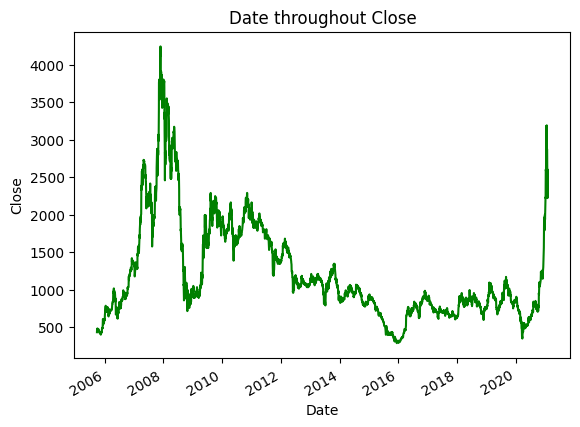

In [ ]:
date_column = 'Date'
close_column = 'Close'

plt.plot_date(df2[date_column], df2[close_column], fmt='-', color='green')
plt.gcf().autofmt_xdate()
plt.title(f'{date_column} throughout {close_column}')
plt.xlabel(date_column)
plt.ylabel(close_column)
plt.show()

This code normalizes (scales) the values in the 'Close' column of the DataFrame df2 using Min-Max scaling, transforming the values to a range between 0 and 1.

In [ ]:
column_to_scale = 'Close'
df2[column_to_scale] = MinMaxScaler().fit_transform(df2[[column_to_scale]])
print(df2)

           Date         Open         High          Low     Close    Adj Close  \
0    2005-09-29   432.588074   436.787964   407.388763  0.036812   304.904572   
1    2005-09-30   457.787384   457.787384   432.588074  0.043184   322.666016   
2    2005-10-03   470.387024   474.586914   440.987854  0.046370   331.546692   
3    2005-10-04   474.586914   482.986694   466.187164  0.047432   334.506927   
4    2005-10-05   482.986694   482.986694   466.187164  0.049556   340.427429   
...         ...          ...          ...          ...       ...          ...   
3803 2021-01-28  2470.000000  2570.000000  2380.000000  0.529219  2380.000000   
3804 2021-01-29  2370.000000  2440.000000  2220.000000  0.488763  2220.000000   
3805 2021-02-01  2090.000000  2640.000000  2070.000000  0.584847  2600.000000   
3806 2021-02-02  2600.000000  2630.000000  2420.000000  0.539333  2420.000000   
3807 2021-02-03  2390.000000  2520.000000  2290.000000  0.516577  2330.000000   

            Volume  
0     

Kode ini mendefinisikan fungsi makewindow yang mengambil DataFrame, membuat jendela berurutan dengan ukuran tertentu dari kolom yang dipilih, dan mengekstrak nilai target yang sesuai, lalu mendemonstrasikan fungsi pada DataFrame df2 yang berfokus pada kolom 'Close'.

In [ ]:
def makewindow(df):
    x = []
    y = []
    window_size = 5
    target_column_index = 0

    for i in range(window_size, len(df)):
        window_data = df.iloc[i - window_size:i, target_column_index]
        target_value = df.iloc[i, target_column_index]

        x.append(window_data)
        y.append(target_value)

    return np.array(x), np.array(y)

x_df2, y_df2 = makewindow(df2[['Close']])
print(x_df2.shape)
print(y_df2.shape)
print(y_df2)

(3802, 5)
(3802,)
[0.04530783 0.04636977 0.04530783 ... 0.58484659 0.53933323 0.51657656]


### b. [LO 1, LO 2, LO 3, LO4 5 point] Separate data into train, validation and test (80:10:10)


Seperating data into train, validation and test

In [ ]:
from sklearn.model_selection import train_test_split

df2 = df2.sort_values(by="Date")


x_train,x_temp,y_train,y_temp = train_test_split(x_df2,
                                                 y_df2,
                                                 test_size = 0.2,
                                                 shuffle = False)

x_val,x_test,y_val,y_test = train_test_split(x_temp,
                                             y_temp,
                                             test_size = 0.5,
                                             shuffle = False)

print("Train set shape:", x_train.shape)
print("Val set shape:", x_val.shape)
print("Test set shape:", x_test.shape)


Train set shape: (3041, 5)
Val set shape: (380, 5)
Test set shape: (381, 5)


Reshape input features for a sequential model

In [ ]:

def reshape_input(data):
    return data.reshape(data.shape[0], data.shape[1], 1)

x_train_reshaped = reshape_input(x_train)
x_val_reshaped = reshape_input(x_val)
x_test_reshaped = reshape_input(x_test)

print("Reshaped Train set shape:", x_train_reshaped.shape)
print("Reshaped Val set shape:", x_val_reshaped.shape)
print("Reshaped Test set shape:", x_test_reshaped.shape)
print("Reshaped Train set shape:", y_train.shape)
print("Reshaped Val set shape:", y_val.shape)
print("Reshaped Test set shape:", y_test.shape)

Reshaped Train set shape: (3041, 5, 1)
Reshaped Val set shape: (380, 5, 1)
Reshaped Test set shape: (381, 5, 1)
Reshaped Train set shape: (3041,)
Reshaped Val set shape: (380,)
Reshaped Test set shape: (381,)


### c. [LO 1, LO 2, LO 3, LO 4 10 point] Create base architecture based on Table 1

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, SimpleRNN

model = Sequential([
    SimpleRNN(units=512, activation = "relu",return_sequences=True, input_shape=(5, 1)),
    SimpleRNN(units=256, activation = "relu",return_sequences=True),
    SimpleRNN(units=128, activation = "relu",return_sequences=False),
    Dropout(0.1),
    Dense(1 , activation = "relu")
])


model.compile(optimizer = 'adam', loss='mean_squared_error', metrics = ['mean_absolute_error'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_18 (SimpleRNN)   (None, 5, 512)            263168    
                                                                 
 simple_rnn_19 (SimpleRNN)   (None, 5, 256)            196864    
                                                                 
 simple_rnn_20 (SimpleRNN)   (None, 128)               49280     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 509441 (1.94 MB)
Trainable params: 509441 (1.94 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_result = model.fit(x_train,
                         y_train,
                         epochs = 35,
                         batch_size = 25,
                         validation_data=(x_val,y_val),
                         verbose = 1)

Epoch 1/35
122/122 [==============================] - 107s 30ms/step - loss: 0.0021 - mean_absolute_error: 0.0279 - val_loss: 5.7801e-05 - val_mean_absolute_error: 0.0057
Epoch 2/35
122/122 [==============================] - 4s 29ms/step - loss: 6.9705e-04 - mean_absolute_error: 0.0175 - val_loss: 1.1357e-04 - val_mean_absolute_error: 0.0093
Epoch 3/35
122/122 [==============================] - 5s 41ms/step - loss: 7.0283e-04 - mean_absolute_error: 0.0175 - val_loss: 5.5593e-05 - val_mean_absolute_error: 0.0061
Epoch 4/35
122/122 [==============================] - 3s 26ms/step - loss: 6.8446e-04 - mean_absolute_error: 0.0173 - val_loss: 4.6068e-05 - val_mean_absolute_error: 0.0052
Epoch 5/35
122/122 [==============================] - 3s 27ms/step - loss: 5.2042e-04 - mean_absolute_error: 0.0149 - val_loss: 3.2839e-05 - val_mean_absolute_error: 0.0041
Epoch 6/35
122/122 [==============================] - 3s 29ms/step - loss: 5.1495e-04 - mean_absolute_error: 0.0149 - val_loss: 3.8086e-0

### d. [LO 1, LO 2, LO 3, LO 4 10 point] Adding Sequential Self-Attention Mechanism and explain how the sequential self-attention mechanism works.


In [ ]:
!pip install keras-self-attention

In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dropout, Dense, Flatten
from keras_self_attention import SeqSelfAttention

model_ssa = Sequential([
    SimpleRNN(units=512, return_sequences=True, input_shape=(5, 1)),
    SeqSelfAttention(attention_activation='sigmoid'),
    SimpleRNN(units=256, return_sequences=True),
    SeqSelfAttention(attention_activation='sigmoid'),
    SimpleRNN(units=128, return_sequences=False),
    Dropout(0.1),
    Flatten(),
    Dense(1, activation="relu")
])

model_ssa.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_24 (SimpleRNN)   (None, 5, 512)            263168    
                                                                 
 seq_self_attention_2 (SeqS  (None, 5, 512)            32833     
 elfAttention)                                                   
                                                                 
 simple_rnn_25 (SimpleRNN)   (None, 5, 256)            196864    
                                                                 
 seq_self_attention_3 (SeqS  (None, 5, 256)            16449     
 elfAttention)                                                   
                                                                 
 simple_rnn_26 (SimpleRNN)   (None, 128)               49280     
                                                                 
 dropout_8 (Dropout)         (None, 128)              

In [ ]:
model_ssa.compile(optimizer='adam', loss='mean_squared_error', metrics = ['mean_absolute_error'])
model_ssa_epoch = model_ssa.fit(x_train,
                         y_train,
                         epochs = 34,
                         batch_size = 25,
                         validation_data=(x_val,y_val))

Epoch 1/34
122/122 [==============================] - 11s 54ms/step - loss: 0.0946 - mean_absolute_error: 0.2324 - val_loss: 0.0026 - val_mean_absolute_error: 0.0504
Epoch 2/34
122/122 [==============================] - 4s 33ms/step - loss: 0.0028 - mean_absolute_error: 0.0337 - val_loss: 5.1077e-05 - val_mean_absolute_error: 0.0053
Epoch 3/34
122/122 [==============================] - 4s 32ms/step - loss: 8.5674e-04 - mean_absolute_error: 0.0204 - val_loss: 6.9223e-05 - val_mean_absolute_error: 0.0067
Epoch 4/34
122/122 [==============================] - 5s 42ms/step - loss: 9.3264e-04 - mean_absolute_error: 0.0207 - val_loss: 4.9154e-05 - val_mean_absolute_error: 0.0054
Epoch 5/34
122/122 [==============================] - 5s 37ms/step - loss: 7.5533e-04 - mean_absolute_error: 0.0186 - val_loss: 2.7337e-04 - val_mean_absolute_error: 0.0152
Epoch 6/34
122/122 [==============================] - 4s 31ms/step - loss: 8.3150e-04 - mean_absolute_error: 0.0200 - val_loss: 2.3391e-04 - val_m

### e. [LO 1, LO 2 & LO 3, LO 4 10 points] Please proceed to evaluate the architecture outlined above on the test set, utilizing evaluation metrics that are congruent with the architecture specified in number 1c and 1d. Include a justification for the choice of these evaluation metrics. Subsequently, provide a detailed explanation of the results obtained.

Alasan pemilihan metrik evaluasi:

Mean Squared Error adalah metrik umum untuk masalah regresi, dan mengukur perbedaan kuadrat rata-rata antara nilai prediksi dan nilai aktual. Ini memberikan hukuman yang lebih berat terhadap kesalahan yang lebih besar daripada kesalahan yang lebih kecil, sehingga memberikan ukuran yang baik untuk akurasi prediksi secara keseluruhan.

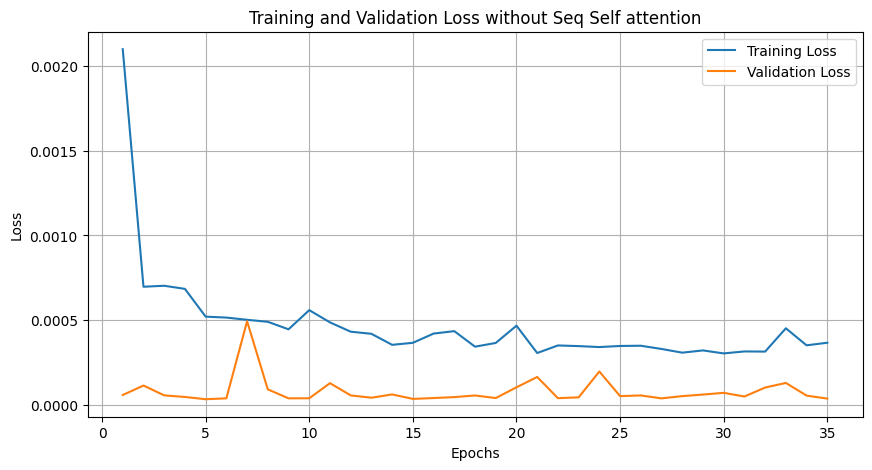

In [ ]:
def plot1_training_history(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(train_loss) + 1)

    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss without Seq Self attention')
    plt.legend()
    plt.grid(True)
    plt.show()

plot1_training_history(model_result)

Penjelasan untuk training dan validation loss sebelum ditambah Sequential self-attention mechanism adalah dapat dilihat bahwa training loss dan validation loss belum menyentuh titik terendahnya. Sehingga test loss belum begitu rendah sehingga model belum begitu maksimal dan dapat terlihat bahwa validation loss dan training lossnya belum begitu dekat sehingga masih sangat berpeluang untuk dibaguskan

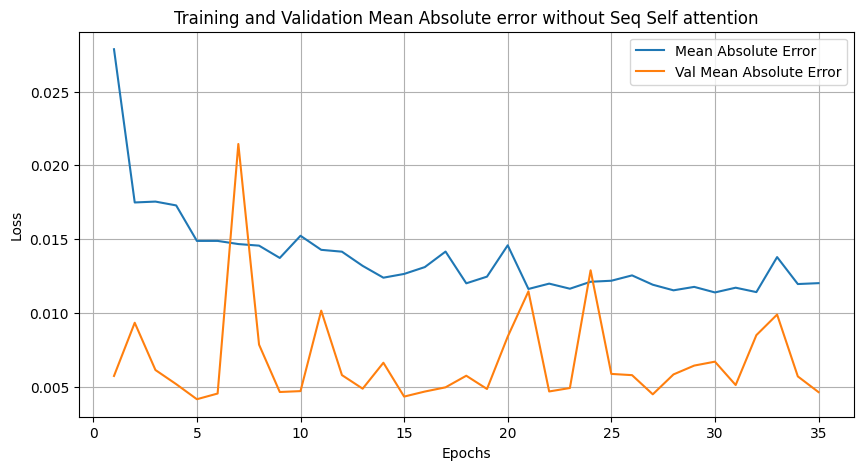

In [ ]:
def plot1_training_history(history):
    train_loss = history.history['mean_absolute_error']
    val_loss = history.history['val_mean_absolute_error']
    epochs = range(1, len(train_loss) + 1)

    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_loss, label='Mean Absolute Error')
    plt.plot(epochs, val_loss, label='Val Mean Absolute Error')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Mean Absolute error without Seq Self attention')
    plt.legend()
    plt.grid(True)
    plt.show()

plot1_training_history(model_result)


Sama seperti gambar training loss da validation, perbandingan antara training dan validation mean squared error belom rendah sehingga tanpa sequential self attention mechanism, model yang dilakukan masih dapat dibaguskan terlebih lagi. Dan dapat dilihat perbandingan mean absolute error dan val mean absolute error belum stabil dikarenakan beberapa faktor dimana salah satunya adalah sequential self-attention mechanism.

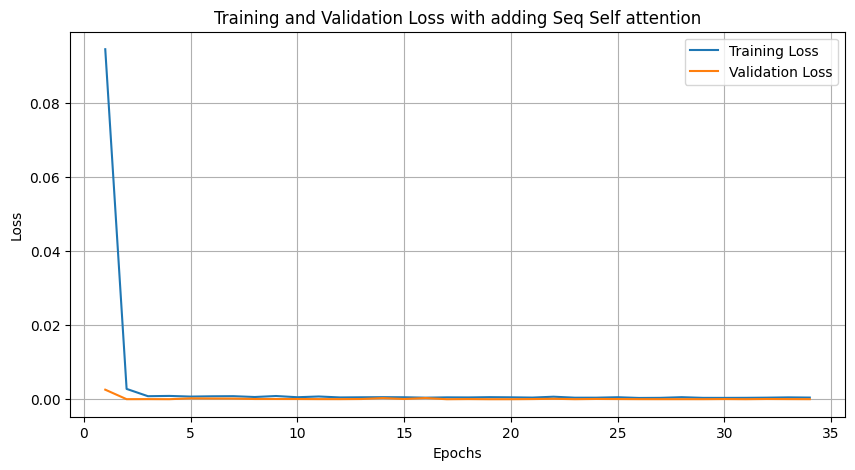

In [ ]:
def plot1_training_history(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(train_loss) + 1)

    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss with adding Seq Self attention')
    plt.legend()
    plt.grid(True)
    plt.show()

plot1_training_history(model_ssa_epoch)

Sequential Self attention adalah varian mekanisme perhatian yang dirancang untuk pemrosesan data berurutan, menekankan urutan elemen dalam suatu urutan. Tidak seperti perhatian diri standar, ini menghitung bobot perhatian secara berurutan untuk setiap posisi dalam urutan, dengan mempertimbangkan ketergantungan dari waktu ke waktu dengan cara autoregresif.

Setelah modelnya diberikan sequential self attention, hasil dari training dan validation loss semakin rendah dan semakin dekat dengan angka 0. Berarti model ini sudah lebih baik dibandingkan dengan training loss dan validation sebelum ditambahkan sequential self attention. Maka dari itu, model sudah membaik karena lossnya sudah rendah.

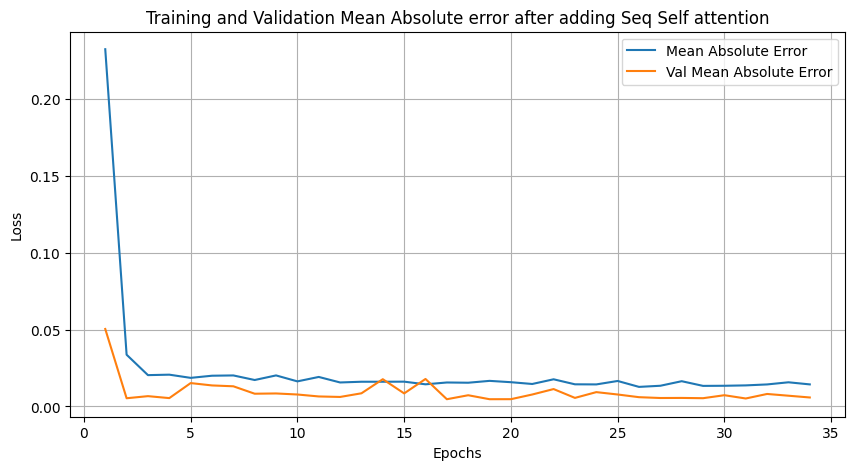

In [ ]:
def plot1_training_history(history):
    train_loss = history.history['mean_absolute_error']
    val_loss = history.history['val_mean_absolute_error']
    epochs = range(1, len(train_loss) + 1)

    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_loss, label='Mean Absolute Error')
    plt.plot(epochs, val_loss, label='Val Mean Absolute Error')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Mean Absolute error after adding Seq Self attention')
    plt.legend()
    plt.grid(True)
    plt.show()

plot1_training_history(model_ssa_epoch)

Sama dengan training dan validation loss diatas, training dan validation MSE sudah rendah juga dimana berarti jika dibandingkan diatas, model sudah improve cukup drastis dimana MSE juga stabil dibawah dan tidak ada spiking pada grafik tersebut. Maka dari itu, model sudah jauh lebih baik dengan adanya Sequential self mechanism .

### f. Create a line chart that displays a comparison between the prediction results from models 1d and 1c, and the actual values

In [ ]:
predict = model.predict(x_test)
predict[:10]

12/12 [==============================] - 0s 18ms/step


array([[0.1560337 ],
       [0.16814432],
       [0.16420013],
       [0.1691059 ],
       [0.16489679],
       [0.1663259 ],
       [0.16310611],
       [0.15511772],
       [0.15623161],
       [0.16529438]], dtype=float32)

In [ ]:
predict_ssa = model_ssa.predict(x_test)
predict_ssa[:10]

12/12 [==============================] - 0s 18ms/step


array([[0.1547901 ],
       [0.16354364],
       [0.16505295],
       [0.17001423],
       [0.17009759],
       [0.17073536],
       [0.16895717],
       [0.16284648],
       [0.16156232],
       [0.16395769]], dtype=float32)

In [ ]:
df_actual = pd.read_csv('X.csv')
df_actual.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-09-29,432.588074,436.787964,407.388763,432.588074,304.904572,76180670.0
1,2005-09-30,457.787384,457.787384,432.588074,457.787384,322.666016,105493978.0
2,2005-10-03,470.387024,474.586914,440.987854,470.387024,331.546692,59712955.0
3,2005-10-04,474.586914,482.986694,466.187164,474.586914,334.506927,56236668.0
4,2005-10-05,482.986694,482.986694,466.187164,482.986694,340.427429,31319315.0


In [ ]:
df_actual['Date'] = pd.to_datetime(df_actual['Date'], format='%Y/%m/%d')
columns_to_convert = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
df_actual[columns_to_convert] = df_actual[columns_to_convert].replace('\.', '', regex=True).astype(float)
df_actual.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-09-29,432.588074,436.787964,407.388763,432.588074,304.904572,76180670.0
1,2005-09-30,457.787384,457.787384,432.588074,457.787384,322.666016,105493978.0
2,2005-10-03,470.387024,474.586914,440.987854,470.387024,331.546692,59712955.0
3,2005-10-04,474.586914,482.986694,466.187164,474.586914,334.506927,56236668.0
4,2005-10-05,482.986694,482.986694,466.187164,482.986694,340.427429,31319315.0


In [ ]:
y_true = np.array(df2['Close'].tail(381))
y_true

array([0.16764085, 0.16511233, 0.17016937, 0.16511233, 0.16637659,
       0.16258381, 0.15246973, 0.15373399, 0.16384807, 0.16384807,
       0.16131955, 0.15499825, 0.14488417, 0.16511233, 0.18154771,
       0.18534049, 0.19671883, 0.18913327, 0.19671883, 0.20809716,
       0.21062568, 0.21062568, 0.20177587, 0.19292605, 0.19798309,
       0.19039753, 0.18407623, 0.18786901, 0.18534049, 0.19292605,
       0.19419031, 0.19798309, 0.22326828, 0.20809716, 0.20556864,
       0.20556864, 0.19924735, 0.21062568, 0.2131542 , 0.21188994,
       0.21062568, 0.19798309, 0.19292605, 0.19292605, 0.19671883,
       0.19166179, 0.19671883, 0.19419031, 0.18407623, 0.18281197,
       0.18407623, 0.17775493, 0.17396215, 0.16890511, 0.16005529,
       0.17143363, 0.17016937, 0.16890511, 0.16258381, 0.17775493,
       0.17901919, 0.18407623, 0.18028345, 0.17649067, 0.17016937,
       0.16890511, 0.16384807, 0.16131955, 0.16258381, 0.16890511,
       0.17396215, 0.16890511, 0.15879103, 0.16131955, 0.16258

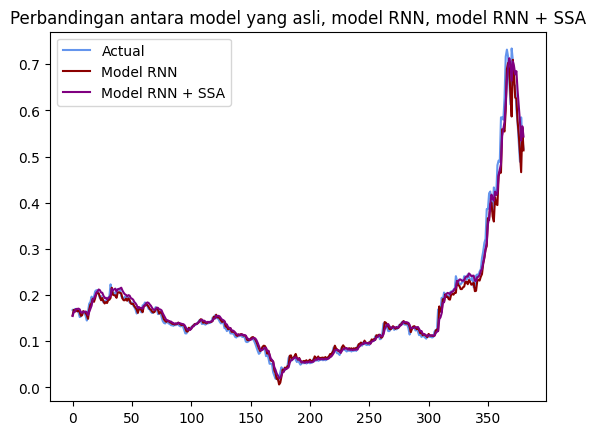

In [ ]:
plt.plot(y_true, label='Actual',color = 'cornflowerblue')
plt.plot(predict, label='Model RNN',color = 'darkred')
plt.plot(predict_ssa, label='Model RNN + SSA',color = 'purple')
plt.legend(loc='upper left')
plt.title('Perbandingan antara model yang asli, model RNN, model RNN + SSA')
plt.show()